In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, balanced_accuracy_score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [2]:
df = pd.read_csv("dataset_23_cmc.csv")
df

,Wifes_age,Wifes_education,Husbands_education,Number_of_children_ever_born,Wifes_religion,Wifes_now_working%3F,Husbands_occupation,Standard-of-living_index,Media_exposure,Contraceptive_method_used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Wifes_age                     1473 non-null   int64
 1   Wifes_education               1473 non-null   int64
 2   Husbands_education            1473 non-null   int64
 3   Number_of_children_ever_born  1473 non-null   int64
 4   Wifes_religion                1473 non-null   int64
 5   Wifes_now_working%3F          1473 non-null   int64
 6   Husbands_occupation           1473 non-null   int64
 7   Standard-of-living_index      1473 non-null   int64
 8   Media_exposure                1473 non-null   int64
 9   Contraceptive_method_used     1473 non-null   int64
dtypes: int64(10)
memory usage: 115.2 KB


In [4]:
target = "Contraceptive_method_used"

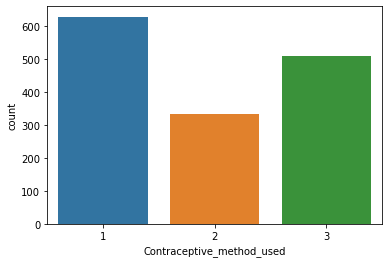

In [5]:
sns.countplot(x = df[target]);


In [6]:
sample_max = df[df[target] == 2].shape[0]
df_aux = pd.DataFrame()
df_aux = pd.concat([df_aux, df.loc[df[(df["Contraceptive_method_used"]==2)].sample(n=sample_max, random_state = 1).index]])
df_aux = pd.concat([df_aux, df.loc[df[(df["Contraceptive_method_used"]==1)].sample(n=sample_max, random_state = 1).index]])
df_aux = pd.concat([df_aux, df.loc[df[(df["Contraceptive_method_used"]==3)].sample(n=sample_max, random_state = 1).index]])
df = df_aux

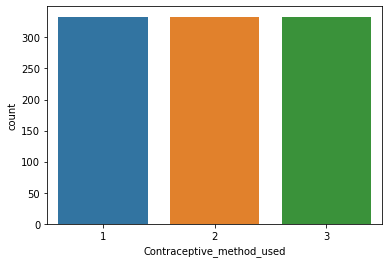

In [7]:
sns.countplot(x = df[target]);

In [8]:
#normalized_df = df

**Normalização entre 0 - 1**

In [9]:
#normlizando 0 - 1
normalized_df = pd.DataFrame()
for i in df.columns:
    if i != target:
        normalized_df[i]=(df[i]-df[i].min())/(df[i].max()-df[i].min())
    else:
        normalized_df[i] = df[i]
        
normalized_df

,Wifes_age,Wifes_education,Husbands_education,Number_of_children_ever_born,Wifes_religion,Wifes_now_working%3F,Husbands_occupation,Standard-of-living_index,Media_exposure,Contraceptive_method_used
474,0.939394,1.000000,1.000000,0.5000,1.0,1.0,0.000000,1.000000,0.0,2
1256,0.939394,1.000000,1.000000,0.2500,0.0,1.0,0.333333,1.000000,0.0,2
595,0.787879,1.000000,1.000000,0.3125,1.0,1.0,0.000000,1.000000,0.0,2
607,0.515152,0.666667,1.000000,0.1875,0.0,1.0,0.333333,1.000000,0.0,2
1272,0.393939,1.000000,1.000000,0.1875,1.0,1.0,0.666667,0.333333,0.0,2
...,...,...,...,...,...,...,...,...,...,...
758,0.969697,0.666667,1.000000,0.1875,1.0,1.0,0.333333,0.666667,0.0,3
854,0.393939,0.666667,0.666667,0.3750,1.0,1.0,0.666667,0.666667,0.0,3
1424,0.181818,0.333333,1.000000,0.1250,1.0,1.0,0.666667,0.333333,0.0,3
1399,0.151515,0.666667,0.666667,0.0625,1.0,1.0,0.666667,0.000000,0.0,3


**Sem GS**

In [10]:
def classificador(model,X_train, X_test,y_train, y_test):
    
    model.fit(X_train, y_train)
    #utilizando acuracia balanceada
    new_row = {"ACC":balanced_accuracy_score(y_test, model.predict(X_test)),"F1":f1_score(y_test, model.predict(X_test), average='weighted') }
    matrix_confusao = confusion_matrix(y_test,model.predict(X_test))



    return (new_row, matrix_confusao)

In [32]:
def otimizadorDeHype(name,X_train,y_train):
    cv = 3
    if name=='knn':
        limite_superior = 100
        limite_inferior = 1 
        limite = list(range(limite_inferior,limite_superior))
        #Parametros a serem escolhidos
        params = {'n_neighbors':limite, 'metric':['euclidean','manhattan']}
        #istanciando 
        gridS = GridSearchCV(KNeighborsClassifier(),params,cv=cv,n_jobs=-1)
        #treinando o grid 
        grid_result = gridS.fit(X_train,y_train)
        return KNeighborsClassifier(metric = grid_result.best_params_['metric'],
                                    n_neighbors = grid_result.best_params_['n_neighbors']  )
    
    if name== 'mlp':
        mlp = MLPClassifier(max_iter=1000)

        params = {
            'hidden_layer_sizes': [(8,8),(316,16),(32,32), (32,64), (64,128)],
            'activation': ['tanh', 'relu'],
            'solver':['sgd','adam'],
            'alpha':[0.0001, 0.05],
            'learning_rate': ['constante','adaptive'],
        }

        gridS = GridSearchCV(mlp,params,n_jobs=-1,cv=cv)
        
        grid_result = gridS.fit(X_train,y_train)
        return MLPClassifier(hidden_layer_sizes=grid_result.best_params_['hidden_layer_sizes'], 
                    activation=grid_result.best_params_['activation'], solver=grid_result.best_params_['solver'],
                    alpha=grid_result.best_params_['alpha'],
                    learning_rate=grid_result.best_params_['learning_rate'], max_iter=100000)
    if name == 'df':
        
        df = DecisionTreeClassifier()
        params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': list(range(2, 10)),
                  'max_depth':list(range(2, 15)),'criterion':["gini", "entropy"]}
        gridS = GridSearchCV(df,params,cv=cv,n_jobs=-1)
        grid_result = gridS.fit(X_train,y_train)
        return DecisionTreeClassifier(max_leaf_nodes = grid_result.best_params_['max_leaf_nodes'],
                                      min_samples_split=grid_result.best_params_['min_samples_split'] ,
                                     max_depth=  grid_result.best_params_['max_depth'],
                                     criterion = grid_result.best_params_['criterion'])
        

In [27]:
X = normalized_df.drop(target, axis=1).values
y = normalized_df[target].values
splits_kfold = 10

In [33]:

kf = StratifiedKFold(n_splits=splits_kfold)
kf.get_n_splits(X,y)

metrics = ["ACC","F1"]

df_knn = pd.DataFrame(columns=metrics)
matriz_knn = []
matriz_tree = []
matriz_mlp = []


df_tree = pd.DataFrame(columns=metrics)
df_mlp = pd.DataFrame(columns=metrics)
df_nb = pd.DataFrame(columns=metrics)
df_reg_log = pd.DataFrame(columns=metrics)



for train_index, test_index in kf.split(X,y):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

    #model = otimizadorDeHype("knn",X_train,y_train)
    #line, matrix = classificador(model,X_train, X_test,y_train, y_test)
    #df_knn = df_knn.append(line, ignore_index=True)
    #matriz_knn.append(matrix)
    
     
        
    #model = otimizadorDeHype("df",X_train,y_train)
    #line, matrix = classificador(model,X_train, X_test,y_train, y_test)
    #df_tree = df_tree.append(line, ignore_index=True)
    #matriz_tree.append(matrix)   
    
    
    
    model = otimizadorDeHype("mlp",X_train,y_train)
    line, matrix = classificador(model,X_train, X_test,y_train, y_test)
    df_mlp = df_mlp.append(line, ignore_index=True)
    matriz_mlp.append(matrix)  
    
    
    
    #model = GaussianNB()
    #df_nb,matrix = df_nb.append(classificador(model,X_train, X_test,y_train, y_test), ignore_index=True) 
    
    
    
    #model = LogisticRegression(solver='liblinear')
    #df_reg_log,matrix = df_reg_log.append(classificador(model,X_train, X_test,y_train, y_test), ignore_index=True) 
    

C:\Users\bhla\anaconda3\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bhla\anaconda3\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bhla\anaconda3\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\bhla\anaconda3\envs\DataScience\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


**KNN Resultados**

In [200]:
df_knn

,ACC,F1
0,0.480095,0.477736
1,0.529709,0.530402
2,0.448010,0.440282
3,0.421569,0.406682
4,0.492573,0.462863
5,0.481581,0.472336
6,0.319073,0.316744
7,0.528818,0.525108
8,0.560903,0.552273
9,0.494949,0.490236


In [201]:
df_knn.mean(),df_knn.std()

(ACC    0.475728
 F1     0.467466
 dtype: float64,
 ACC    0.068261
 F1     0.068553
 dtype: float64)

Plot das matrizes de confusão

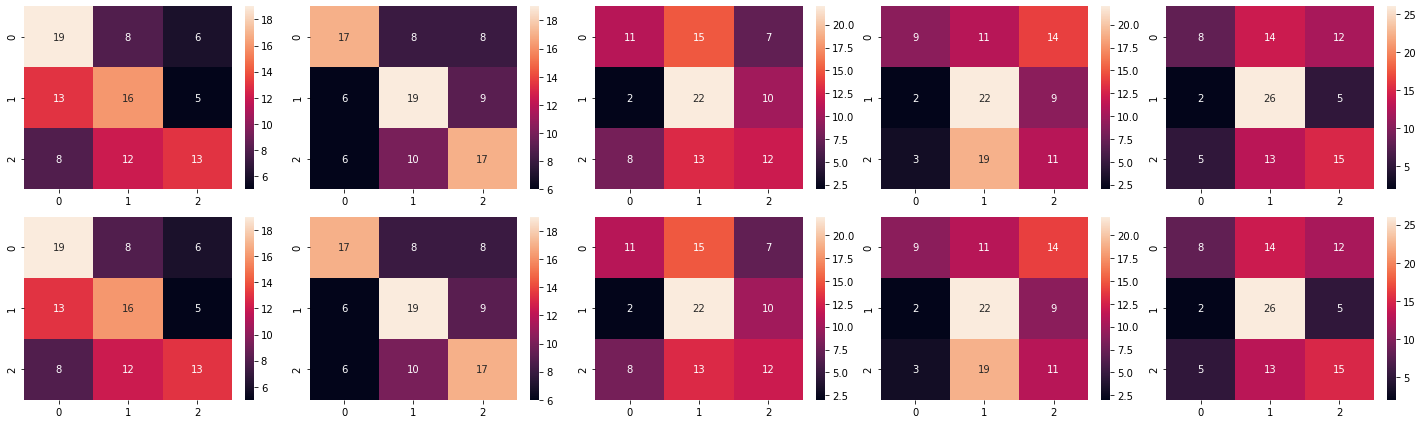

In [205]:
sns.color_palette("coolwarm", as_cmap=True)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,6))
for i in range(5):
    for j in range(2):
        sns.heatmap(matriz_knn[i], annot=True, ax = axes[j][i])

plt.tight_layout()

**DT Resutaldos**

In [29]:
df_tree

,ACC,F1
0,0.519905,0.524508
1,0.439988,0.431663
2,0.549020,0.538895
3,0.489899,0.497358
4,0.530303,0.518830
5,0.530303,0.535344
6,0.449198,0.449178
7,0.480689,0.476315
8,0.600713,0.600707
9,0.555556,0.551643


In [30]:
df_tree.mean(),df_tree.std()

(ACC    0.514557
 F1     0.512444
 dtype: float64,
 ACC    0.049892
 F1     0.050330
 dtype: float64)

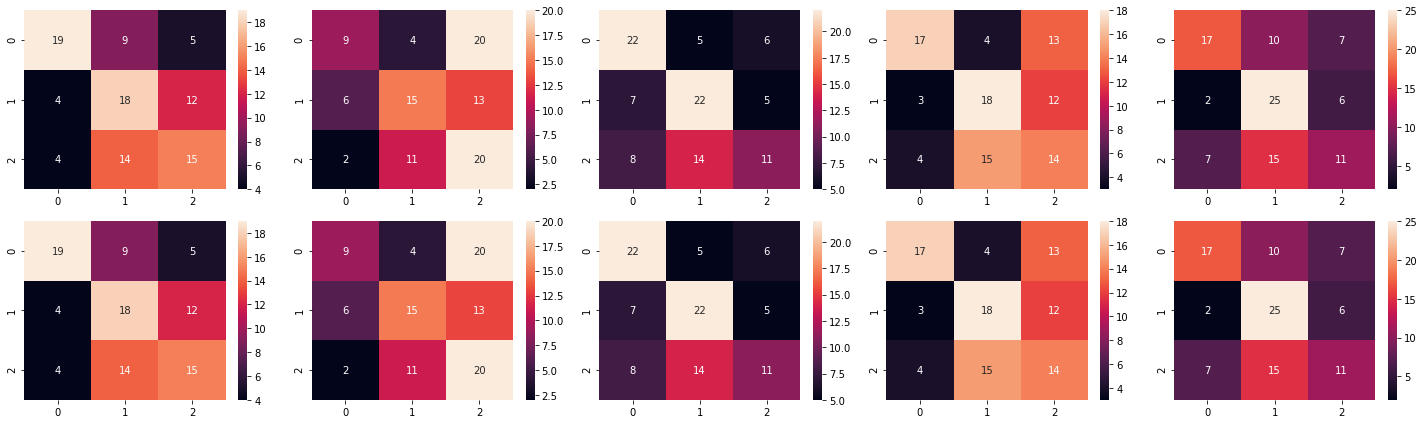

In [31]:
sns.color_palette("coolwarm", as_cmap=True)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,6))
for i in range(5):
    for j in range(2):
        sns.heatmap(matriz_tree[i], annot=True, ax = axes[j][i])

plt.tight_layout()

**Multilayer Perceptron Resultados**

In [34]:
df_mlp

,ACC,F1
0,0.599822,0.593011
1,0.509210,0.510896
2,0.459002,0.457402
3,0.489305,0.485168
4,0.601010,0.600423
5,0.559418,0.560044
6,0.560012,0.557662
7,0.530006,0.527257
8,0.550505,0.546084
9,0.585859,0.586191


In [35]:
df_mlp.mean(),df_mlp.std()

(ACC    0.544415
 F1     0.542414
 dtype: float64,
 ACC    0.047464
 F1     0.047288
 dtype: float64)

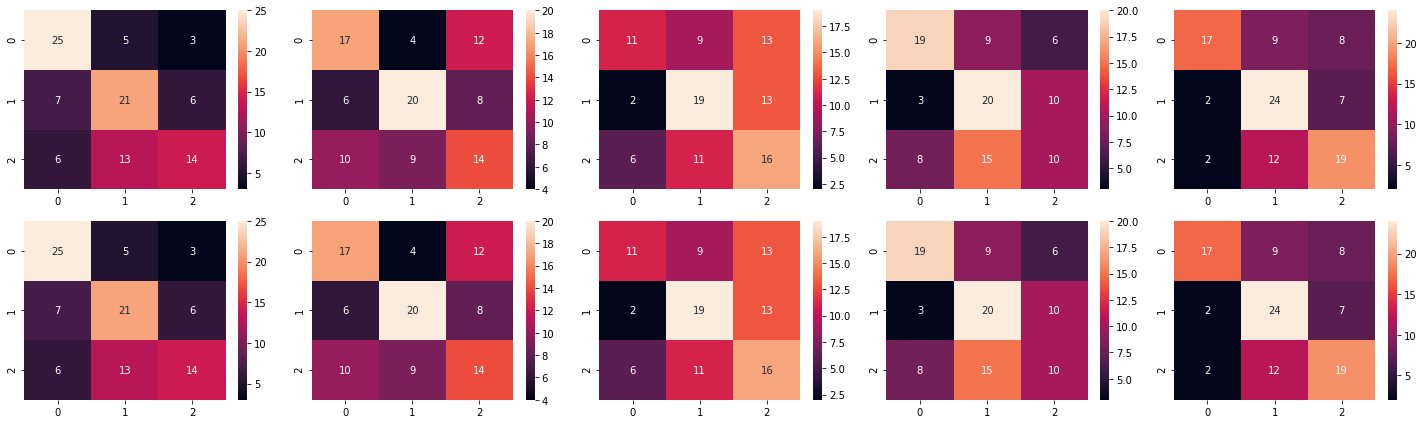

In [36]:
sns.color_palette("coolwarm", as_cmap=True)
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20,6))
for i in range(5):
    for j in range(2):
        sns.heatmap(matriz_mlp[i], annot=True, ax = axes[j][i])

plt.tight_layout()

**Naive Bayes Resultados**

In [89]:
df_nb.mean(),df_nb.std()

(ACC    0.510508
 F1     0.503888
 dtype: float64,
 ACC    0.039690
 F1     0.039559
 dtype: float64)

**Regressão Logistica Resutaldos**

In [90]:
df_reg_log.mean(),df_reg_log.std()

(ACC    0.514458
 F1     0.512922
 dtype: float64,
 ACC    0.042153
 F1     0.042514
 dtype: float64)